Dette er prosjektoppgave i PY1010 våren 2025
Jeg har valgt å bruke standard oppgave.

I første steg ønsker jeg importere en excelfil for så å undersøke hva feilen inneholder for så å konvertere data til en array

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [221]:
# Leser inn Excel-filen
kundebase = pd.read_excel('support_uke_24.xlsx', sheet_name = "Morse")

# Viser kolonnenavn og første radene i excelarket for å se hva den inneholder
print(kundebase.head())

#konverterer så inn de ulike kolonnene som arrays

   Ukedag Klokkeslett  Varighet  Tilfredshet
0  Mandag    08:04:16  00:07:12          NaN
1  Mandag    08:04:53  00:02:49          6.0
2  Mandag    08:06:31  00:08:36          NaN
3  Mandag    08:11:21  00:04:34          NaN
4  Mandag    08:20:46  00:07:38          NaN


In [222]:
#konverterer så inn de ulike kolonnene som arrays med nye navn
u_dag = kundebase ['Ukedag'].values
kl_slett = kundebase ['Klokkeslett'].values
varighet = kundebase ['Varighet'].values
score = kundebase ['Tilfredshet'].values


I neste steg ønsker jeg å finne ut hvor mange henvendelser det er som kommer inn for hver av de fem ukedagene og visualisere det med et søylediagram.

In [224]:
#finn ut hvilke dager som finnes i basen
dager = np.unique(u_dag)
print(dager)
#når jeg kjenner dagene som er i arrayen lager jeg en ny array som setter dagene i vant rekkefølge
dager_sortert = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]
#Lager så en variabel som kan holde på antall dager slik at jeg kan legge sammen antall ganger dagen forekommer
ant_mandag = 0
ant_tirsdag = 0
ant_onsdag = 0
ant_torsdag = 0
ant_fredag = 0


for dag in u_dag:
    if dag == "Mandag":
      ant_mandag += 1
    if dag == "Tirsdag":
      ant_tirsdag += 1
    if dag == "Onsdag":
      ant_onsdag += 1
    if dag == "Torsdag":
      ant_torsdag += 1
    if dag == "Fredag":
        ant_fredag += 1

#Lager så en array med antall henvendelser per dag      
ant_henvendelser =[ant_mandag, ant_tirsdag, ant_onsdag, ant_torsdag, ant_fredag]  

['Fredag' 'Mandag' 'Onsdag' 'Tirsdag' 'Torsdag']


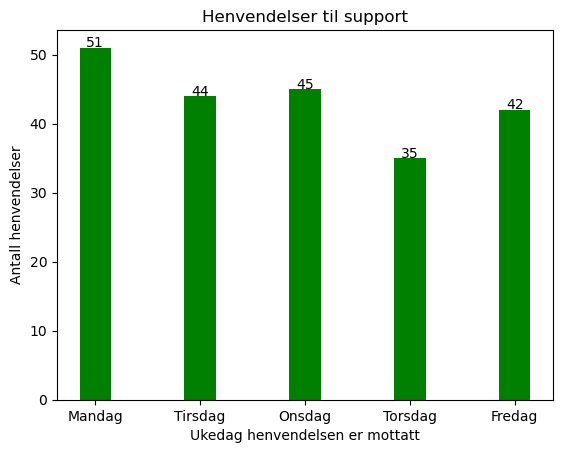

In [252]:
#Plotter et søylediagram med ønsket farger, tekster og verdier på toppen av søylen og legger til aksetitler og header
plt.bar(dager_sortert, ant_henvendelser, color="green", width = 0.3)
for i, verdi in enumerate(ant_henvendelser):
    plt.text(i, verdi + 0.1, str(verdi), ha='center')

plt.title("Henvendelser til support")
plt.xlabel("Ukedag henvendelsen er mottatt")
plt.ylabel("Antall henvendelser")

a = a

I neste steg ønsker jeg å finne ut hva den lengste og korteste samtaletiden er

In [227]:
#sorterer arrayen med varighet, for da vil korteste varighet komme først og lengste varighet sist
sortert_lengde = np.sort(varighet)
antall_varighet = len(sortert_lengde)
print("Samtalen med kortest varighet varte i:", sortert_lengde[0], ", angitt som timer:minutter:sekunder.")
print("Samtalen med lengst varighet varte i:",sortert_lengde[antall_varighet-1], ", angitt som timer:minutter:sekunder.") 



Samtalen med kortest varighet varte i: 00:00:59 , angitt som timer:minutter:sekunder.
Samtalen med lengst varighet varte i: 00:11:28 , angitt som timer:minutter:sekunder.


I neste steg ønsker jeg å regne ut hvor lang den gjennomsnittlige samtaletiden er. Dette kan løses ved å konvertere tiden til sekunder, summere den og dele på antall henvendelser

In [229]:
#konverter tiden til sekunder og lager en ny array
def tid_til_sek (tid):
   timer, minutter, sekunder = map(int, tid.split(':'))
   return timer * 3600 + minutter * 60 + sekunder

varighet_sek =  [tid_til_sek(tid) for tid in varighet]

#regner ut sum varighet for så å dele på antall henvendelser
total_varighet = sum (varighet_sek)
gjennomsnittlig_varighet = int(total_varighet/antall_varighet)


# konverterer så sekunder igjen til minutter og sekunder og printer
def sek_til_min_sek(sekunder):
    minutter = sekunder // 60  # Heltallsdivisjon for å få antall hele minutter
    rest_sekunder = sekunder % 60  # Modulo for å få resterende sekunder
    return minutter, rest_sekunder

minutter, sekunder = sek_til_min_sek(gjennomsnittlig_varighet )

print(f"Gjennomsnittlig varighet på en samtale er : {minutter} minutter og {sekunder} sekunder")

Gjennomsnittlig varighet på en samtale er : 6 minutter og 40 sekunder


I det neste ønsker jeg å finne ut hvor mange henvendelser det er innenfor et gitt tidsintervall

In [231]:
#henter ut time og lager ny variabel, deretter teller jeg antall henvendelser fer time i grupper

kl_slett = pd.to_datetime(kl_slett, format='%H:%M:%S')

# Funksjon for å kategorisere klokkeslett i grupper
def kategoriser_klokkeslett(tid):
  time = tid.hour
  if 8 <= time < 10:
      return '8-10'
  elif 10 <= time < 12:
      return '10-12'
  elif 12 <= time < 14:
       return '12-14'
  else:
      return '14-16'

time = [kategoriser_klokkeslett(tid) for tid in kl_slett]


#Lager så en variabel som kan holde på antall ganger tidsslik at jeg kan legge sammen antall ganger tiden forekommer
ant_8_10 = 0
ant_10_12 = 0
ant_12_14 = 0
ant_14_16 = 0


for supportvakt in time:
    if supportvakt == "8-10":
      ant_8_10 += 1
    if supportvakt == "10-12":
      ant_10_12 += 1
    if supportvakt == "12-14":
      ant_12_14 += 1
    if supportvakt == "14-16":
      ant_14_16 += 1
   
#Lager så en array med antall henvendelser per kategori      
ant_henvendelser_vakt =[ant_8_10, ant_10_12, ant_12_14, ant_14_16]  
supportvakt_tider= ['8-10','10-12','12-14','14-16']

  

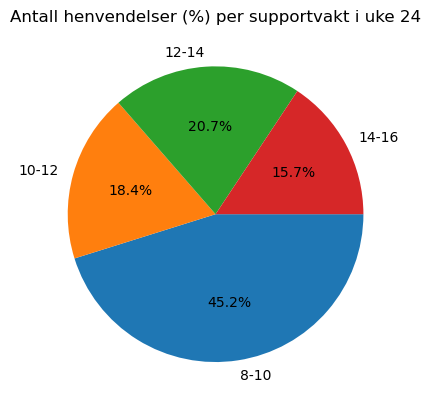

In [232]:
#Plotter et kakediagram med ulike farger, tekster og verdier på toppen av søylen og legger til aksetitler og header
plt.pie(ant_henvendelser_vakt, labels=supportvakt_tider,autopct='%1.1f%%', counterclock=False)
plt.title("Antall henvendelser (%) per supportvakt i uke 24")
a=a

I det siste skal kundens tilfredshet vurderes etter hvilken score som er oppgitt og bedriftens NPS skal beregnes. NPS beregnes som andel positive kunder minus andel negative kunder. 

In [234]:
#Starter med å se på tilfredshetscoren
print(score)

[nan  6. nan nan nan  8. nan nan 10. nan nan nan nan nan nan nan  8. nan
 nan nan nan nan nan  9. nan nan nan 10. nan 10. nan nan nan nan nan nan
 nan nan  9. 10. nan nan nan nan nan nan  3.  3. nan 10. nan nan nan nan
 nan nan nan nan  9.  9. nan nan nan nan nan nan nan nan  9. nan 10. nan
 nan nan nan 10. nan nan nan nan nan nan nan nan nan  5. nan nan nan nan
 nan 10. nan nan nan nan nan nan 10. 10. nan nan nan nan nan nan nan nan
  1.  9. nan nan  1. nan 10. nan nan nan  5. nan nan nan nan nan nan nan
 nan  7. nan  9. nan nan nan nan nan nan nan nan nan nan nan 10. nan 10.
 10. nan nan nan nan nan nan nan  9.  2.  9. nan nan nan nan nan nan 10.
 nan 10. nan nan nan nan nan nan  5. nan nan nan nan nan nan nan nan nan
 nan  7.  7. nan nan nan nan nan nan nan nan nan nan nan 10. nan nan nan
 nan nan nan nan nan nan nan nan nan nan  1.  9. nan nan nan nan nan nan
 10.]


In [235]:
#Lager så en variabel som kan holde på antall ganger en score opptrer slik at jeg kan legge sammen antall ganger scoren forekommer
ant_NA = 0
ant_1_6 = 0
ant_7_8 = 0
ant_9_10 = 0


for tilfreds in score:
    if  np.isnan (tilfreds): #teller opp alle gangene nan forekommer
      ant_NA += 1
    elif 1 <= tilfreds <7:
      ant_1_6 += 1
    elif 7 <= tilfreds <9 :
      ant_7_8 += 1
    elif 9 <= tilfreds <=10 :
      ant_9_10 += 1
   
#Lager så en array med antall henvendelser per kategori      
ant_score_kategori =[ant_NA, ant_1_6, ant_7_8, ant_9_10]  
#summerer tallene i arrayen på de "riktige" kategoriene 
ant_svar = sum (ant_score_kategori[1:4])
NPS= ((ant_9_10 / ant_svar)-(ant_1_6 / ant_svar ))
NPS_prosent = round(NPS * 100, 1)
print(f"NPS for supportavdelingen er: {NPS_prosent} % ")



NPS for supportavdelingen er: 41.9 % 
